In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Одномерная функция

Определим одномерную функцию ${f(x)}$ и ее производную, вычисленную аналитически:

In [2]:
from functions.functions_under_study import f_2D, grad_2D

Рассмотрим метод
__[numpy.gradient](https://numpy.org/doc/2.0/reference/generated/numpy.gradient.html#numpy-gradient)__
на примере массива небольшого размера.
В одномерном случае результатом является массив значений производной в каждой точке входного массива.
Вычисления привязаны к шагу аргумента дифференцируемой функции. В случае постоянного шага имеется возможность задавать его одной константой.

In [3]:
N_point_grad = [2, 3, 4, 5]
for n in N_point_grad:
    x = np.linspace(0, 0.1, n)
    x_step = x[1] - x[0]
    y = f_2D(x)
    print('Number of points:', n)
    print('numpy.gradient:', np.gradient(y, x_step))
    print('Derivative:', grad_2D(x))


Number of points: 2
numpy.gradient: [-5.305 -5.305]
Derivative: [-5.    -5.615]
Number of points: 3
numpy.gradient: [-5.15125 -5.305   -5.45875]
Derivative: [-5.      -5.30375 -5.615  ]
Number of points: 4
numpy.gradient: [-5.10055556 -5.20222222 -5.40722222 -5.51055556]
Derivative: [-5.         -5.20166667 -5.40666667 -5.615     ]
Number of points: 5
numpy.gradient: [-5.0753125 -5.15125   -5.3040625 -5.45875   -5.5365625]
Derivative: [-5.        -5.1509375 -5.30375   -5.4584375 -5.615    ]


Анализируя результаты можно сделать следующие выводы:
- Крайние точки в массиве градиента отличаются значительно от точного значения производной. Массив из 2х точек недопустим.
- Приминительно к задачи нахождения градиента в точке оптимальный размер массива: 3. При этом, набольшая точность у второго с конца значения.

Визуализируем значения градиента и производной:

<function matplotlib.pyplot.show(close=None, block=None)>

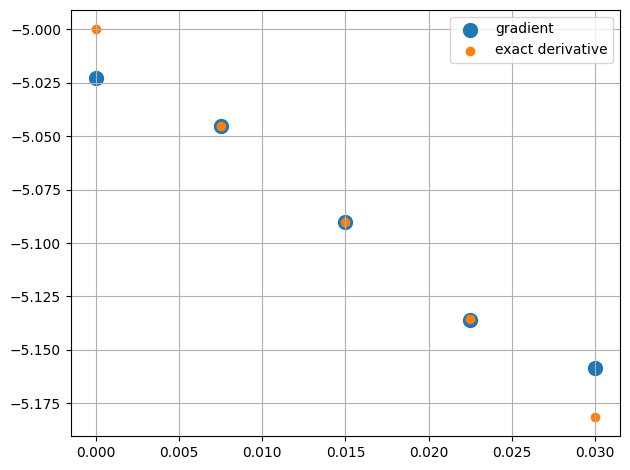

In [4]:
x = np.linspace(0, 0.03, 5)
x_step = x[1] - x[0]
plt.scatter(x, np.gradient(f_2D(x), x_step), s=100)
plt.scatter(x, grad_2D(x))
plt.grid()
plt.legend(['gradient', 'exact derivative'])
plt.tight_layout()
plt.show

# Многомерные функции
## Функция двух переменных

In [5]:
from functions.functions_under_study import f_3D, grad_3D

In [6]:
# Инициализируем искомые значения.
w_coeff_1 = np.array([-2.2,-1.1])
# Принимаем шаг в 5% относительно начального приближения и вводим соответствующие приращения.
w_coeff = 0.95 * w_coeff_1
w_coeff_2 = 1.05 * w_coeff_1
# Массивы для каждой переменной отдельно.
x1 = [w_coeff[0], w_coeff_1[0], w_coeff_2[0]]
x2 = [w_coeff[1], w_coeff_1[1], w_coeff_2[1]]
# Конвертируем в сетку.
X1, X2 = np.meshgrid(x1, x2)
print('Переменная 1:\n', np.round(x1,2))
print('Переменная 2:\n', np.round(x2,2))
print('Сетка по переменной 1:\n', np.round(X1,2))
print('Сетка по переменной 2:\n', np.round(X2,2))

Переменная 1:
 [-2.09 -2.2  -2.31]
Переменная 2:
 [-1.04 -1.1  -1.16]
Сетка по переменной 1:
 [[-2.09 -2.2  -2.31]
 [-2.09 -2.2  -2.31]
 [-2.09 -2.2  -2.31]]
Сетка по переменной 2:
 [[-1.04 -1.04 -1.04]
 [-1.1  -1.1  -1.1 ]
 [-1.16 -1.16 -1.16]]


Таблица значений функции на сетке.

In [7]:
# ВАЖНО! Переменные перечисляем в ПРЯМОМ порядке.
loss_func_grad = f_3D([X1,X2])
loss_func_grad

array([[160.610825, 158.205125, 155.847825],
       [181.9962  , 179.53    , 177.1122  ],
       [204.621825, 202.095125, 199.616825]])

Градиент функции в точках сетки (численное дифференцирование).

In [8]:
# ВАЖНО! Переменные перечисляем в ОБРАТНОМ порядке.
grad = np.gradient(loss_func_grad, x2, x1)

Градиент по явнозаданной функции.

In [9]:
grad_manual = grad_3D([X1,X2])

Сравниваем значения градиента.

In [10]:
print('1st grad-axis:\n', 'Numerical:\n', np.round(grad[0],2), '\n\n', 'Equation:\n', np.round(grad_manual[1],2))
print('2nd grad-axis:\n', 'Numerical:\n', np.round(grad[1],2), '\n\n', 'Equation:\n', np.round(grad_manual[0],2))

1st grad-axis:
 Numerical:
 [[-388.83 -387.73 -386.63]
 [-400.1  -399.   -397.9 ]
 [-411.38 -410.28 -409.18]] 

 Equation:
 [[-377.55 -376.45 -375.35]
 [-400.1  -399.   -397.9 ]
 [-422.65 -421.55 -420.45]]
2nd grad-axis:
 Numerical:
 [[21.87 21.65 21.43]
 [22.42 22.2  21.98]
 [22.97 22.75 22.53]] 

 Equation:
 [[22.09 21.65 21.21]
 [22.64 22.2  21.76]
 [23.19 22.75 22.31]]


Выбираем значение в центре окрестности.

In [11]:
print('1st grad-axis:\n', np.round(grad[0][1,1],2), np.round(grad_manual[1][1,1],2))
print('2nd grad-axis:\n', np.round(grad[1][1,1],2), np.round(grad_manual[0][1,1],2))

1st grad-axis:
 -399.0 -399.0
2nd grad-axis:
 22.2 22.2


## Функция трех переменных

In [12]:
from functions.functions_under_study import f_4D, grad_4D

In [13]:
# Инициализируем искомые значения.
w_coeff_1 = np.array([-2.2,-1.1,1.1])
# Принимаем шаг в 5% относительно начального приближения и вводим соответствующие приращения.
w_step = 0.05 * w_coeff_1
w_coeff = w_coeff_1 - w_step
w_coeff_2 = w_coeff_1 + w_step
# Массивы для каждой переменной отдельно.
x1 = [w_coeff[0], w_coeff_1[0], w_coeff_2[0]]
x2 = [w_coeff[1], w_coeff_1[1], w_coeff_2[1]]
x3 = [w_coeff[2], w_coeff_1[2], w_coeff_2[2]]
# Конвертируем в сетку.
X1, X2, X3 = np.meshgrid(x1, x2, x3, indexing='ij')
print('Переменная 1:\n', np.round(x1,2))
print('Переменная 2:\n', np.round(x2,2))
print('Переменная 3:\n', np.round(x3,2))

Переменная 1:
 [-2.09 -2.2  -2.31]
Переменная 2:
 [-1.05 -1.1  -1.16]
Переменная 3:
 [1.05 1.1  1.16]


In [14]:
print('Сетка по переменной 1:\n', np.round(X1,2))

Сетка по переменной 1:
 [[[-2.09 -2.09 -2.09]
  [-2.09 -2.09 -2.09]
  [-2.09 -2.09 -2.09]]

 [[-2.2  -2.2  -2.2 ]
  [-2.2  -2.2  -2.2 ]
  [-2.2  -2.2  -2.2 ]]

 [[-2.31 -2.31 -2.31]
  [-2.31 -2.31 -2.31]
  [-2.31 -2.31 -2.31]]]


In [15]:
print('Сетка по переменной 2:\n', np.round(X2,2))

Сетка по переменной 2:
 [[[-1.05 -1.05 -1.05]
  [-1.1  -1.1  -1.1 ]
  [-1.16 -1.16 -1.16]]

 [[-1.05 -1.05 -1.05]
  [-1.1  -1.1  -1.1 ]
  [-1.16 -1.16 -1.16]]

 [[-1.05 -1.05 -1.05]
  [-1.1  -1.1  -1.1 ]
  [-1.16 -1.16 -1.16]]]


In [16]:
print('Сетка по переменной 3:\n', np.round(X3,2))

Сетка по переменной 3:
 [[[1.05 1.1  1.16]
  [1.05 1.1  1.16]
  [1.05 1.1  1.16]]

 [[1.05 1.1  1.16]
  [1.05 1.1  1.16]
  [1.05 1.1  1.16]]

 [[1.05 1.1  1.16]
  [1.05 1.1  1.16]
  [1.05 1.1  1.16]]]


Таблица значений функции на сетке.

In [17]:
# ВАЖНО! Переменные перечисляем в ПРЯМОМ порядке.
loss_func_grad = f_4D([X1,X2,X3])
loss_func_grad

array([[[280.733575, 293.710825, 307.353575],
        [302.11895 , 315.0962  , 328.73895 ],
        [324.744575, 337.721825, 351.364575]],

       [[278.327875, 291.305125, 304.947875],
        [299.65275 , 312.63    , 326.27275 ],
        [322.217875, 335.195125, 348.837875]],

       [[275.970575, 288.947825, 302.590575],
        [297.23495 , 310.2122  , 323.85495 ],
        [319.739575, 332.716825, 346.359575]]])

Градиент функции в точках сетки (численное дифференцирование).

In [18]:
# ВАЖНО! Шаг перечисляем в ПРЯМОМ порядке (в отличии от случая перечисления переменных).
grad = np.gradient(loss_func_grad, w_step[0], w_step[1], w_step[2])
grad

(array([[[21.87, 21.87, 21.87],
         [22.42, 22.42, 22.42],
         [22.97, 22.97, 22.97]],
 
        [[21.65, 21.65, 21.65],
         [22.2 , 22.2 , 22.2 ],
         [22.75, 22.75, 22.75]],
 
        [[21.43, 21.43, 21.43],
         [21.98, 21.98, 21.98],
         [22.53, 22.53, 22.53]]]),
 array([[[-388.825, -388.825, -388.825],
         [-400.1  , -400.1  , -400.1  ],
         [-411.375, -411.375, -411.375]],
 
        [[-387.725, -387.725, -387.725],
         [-399.   , -399.   , -399.   ],
         [-410.275, -410.275, -410.275]],
 
        [[-386.625, -386.625, -386.625],
         [-397.9  , -397.9  , -397.9  ],
         [-409.175, -409.175, -409.175]]]),
 array([[[235.95, 242.  , 248.05],
         [235.95, 242.  , 248.05],
         [235.95, 242.  , 248.05]],
 
        [[235.95, 242.  , 248.05],
         [235.95, 242.  , 248.05],
         [235.95, 242.  , 248.05]],
 
        [[235.95, 242.  , 248.05],
         [235.95, 242.  , 248.05],
         [235.95, 242.  , 248.05]]]))

Градиент по явнозаданной функции.

In [19]:
grad_manual = grad_4D([X1,X2,X3])
grad_manual

array([[[[  22.09,   22.09,   22.09],
         [  22.64,   22.64,   22.64],
         [  23.19,   23.19,   23.19]],

        [[  21.65,   21.65,   21.65],
         [  22.2 ,   22.2 ,   22.2 ],
         [  22.75,   22.75,   22.75]],

        [[  21.21,   21.21,   21.21],
         [  21.76,   21.76,   21.76],
         [  22.31,   22.31,   22.31]]],


       [[[-377.55, -377.55, -377.55],
         [-400.1 , -400.1 , -400.1 ],
         [-422.65, -422.65, -422.65]],

        [[-376.45, -376.45, -376.45],
         [-399.  , -399.  , -399.  ],
         [-421.55, -421.55, -421.55]],

        [[-375.35, -375.35, -375.35],
         [-397.9 , -397.9 , -397.9 ],
         [-420.45, -420.45, -420.45]]],


       [[[ 229.9 ,  242.  ,  254.1 ],
         [ 229.9 ,  242.  ,  254.1 ],
         [ 229.9 ,  242.  ,  254.1 ]],

        [[ 229.9 ,  242.  ,  254.1 ],
         [ 229.9 ,  242.  ,  254.1 ],
         [ 229.9 ,  242.  ,  254.1 ]],

        [[ 229.9 ,  242.  ,  254.1 ],
         [ 229.9 ,  242.  ,  2

Сравниваем значения градиента.

In [20]:
print('1st grad-axis:\n', 'Numerical:\n', np.round(grad[0],2), '\n\n', 'Equation:\n', np.round(grad_manual[0],2))

1st grad-axis:
 Numerical:
 [[[21.87 21.87 21.87]
  [22.42 22.42 22.42]
  [22.97 22.97 22.97]]

 [[21.65 21.65 21.65]
  [22.2  22.2  22.2 ]
  [22.75 22.75 22.75]]

 [[21.43 21.43 21.43]
  [21.98 21.98 21.98]
  [22.53 22.53 22.53]]] 

 Equation:
 [[[22.09 22.09 22.09]
  [22.64 22.64 22.64]
  [23.19 23.19 23.19]]

 [[21.65 21.65 21.65]
  [22.2  22.2  22.2 ]
  [22.75 22.75 22.75]]

 [[21.21 21.21 21.21]
  [21.76 21.76 21.76]
  [22.31 22.31 22.31]]]


In [21]:
print('2nd grad-axis:\n', 'Numerical:\n', np.round(grad[1],2), '\n\n', 'Equation:\n', np.round(grad_manual[1],2))

2nd grad-axis:
 Numerical:
 [[[-388.82 -388.82 -388.82]
  [-400.1  -400.1  -400.1 ]
  [-411.37 -411.37 -411.37]]

 [[-387.73 -387.72 -387.72]
  [-399.   -399.   -399.  ]
  [-410.27 -410.27 -410.27]]

 [[-386.62 -386.62 -386.62]
  [-397.9  -397.9  -397.9 ]
  [-409.17 -409.17 -409.17]]] 

 Equation:
 [[[-377.55 -377.55 -377.55]
  [-400.1  -400.1  -400.1 ]
  [-422.65 -422.65 -422.65]]

 [[-376.45 -376.45 -376.45]
  [-399.   -399.   -399.  ]
  [-421.55 -421.55 -421.55]]

 [[-375.35 -375.35 -375.35]
  [-397.9  -397.9  -397.9 ]
  [-420.45 -420.45 -420.45]]]


In [22]:
print('3rd grad-axis:\n', 'Numerical:\n', np.round(grad[2],2), '\n\n', 'Equation:\n', np.round(grad_manual[2],2))

3rd grad-axis:
 Numerical:
 [[[235.95 242.   248.05]
  [235.95 242.   248.05]
  [235.95 242.   248.05]]

 [[235.95 242.   248.05]
  [235.95 242.   248.05]
  [235.95 242.   248.05]]

 [[235.95 242.   248.05]
  [235.95 242.   248.05]
  [235.95 242.   248.05]]] 

 Equation:
 [[[229.9 242.  254.1]
  [229.9 242.  254.1]
  [229.9 242.  254.1]]

 [[229.9 242.  254.1]
  [229.9 242.  254.1]
  [229.9 242.  254.1]]

 [[229.9 242.  254.1]
  [229.9 242.  254.1]
  [229.9 242.  254.1]]]


Выбираем значение в центре окрестности.

In [23]:
print('1st grad-axis:\n', np.round(grad[0][1][1,1],2), np.round(grad_manual[0][1][1,1],2))
print('2nd grad-axis:\n', np.round(grad[1][1][1,1],2), np.round(grad_manual[1][1][1,1],2))
print('3rd grad-axis:\n', np.round(grad[2][1][1,1],2), np.round(grad_manual[2][1][1,1],2))

1st grad-axis:
 22.2 22.2
2nd grad-axis:
 -399.0 -399.0
3rd grad-axis:
 242.0 242.0


## Функция четырех переменных

In [24]:
from functions.functions_under_study import f_5D, grad_5D

In [25]:
# Инициализируем искомые значения.
w_coeff_1 = np.array([-2.2,-1.1,1.1,2.2])
# Принимаем шаг в 5% относительно начального приближения и вводим соответствующие приращения.
w_step = 0.05 * w_coeff_1
w_coeff = w_coeff_1 - w_step
w_coeff_2 = w_coeff_1 + w_step
# Массивы для каждой переменной отдельно.
x1 = [w_coeff[0], w_coeff_1[0], w_coeff_2[0]]
x2 = [w_coeff[1], w_coeff_1[1], w_coeff_2[1]]
x3 = [w_coeff[2], w_coeff_1[2], w_coeff_2[2]]
x4 = [w_coeff[3], w_coeff_1[3], w_coeff_2[3]]
# Конвертируем в сетку.
X1, X2, X3, X4 = np.meshgrid(x1, x2, x3, x4, indexing='ij')
print('Переменная 1:\n', np.round(x1,2))
print('Переменная 2:\n', np.round(x2,2))
print('Переменная 3:\n', np.round(x3,2))
print('Переменная 3:\n', np.round(x4,2))

Переменная 1:
 [-2.09 -2.2  -2.31]
Переменная 2:
 [-1.05 -1.1  -1.16]
Переменная 3:
 [1.05 1.1  1.16]
Переменная 3:
 [2.09 2.2  2.31]


Таблица значений функции на сетке.

In [26]:
# ВАЖНО! Переменные перечисляем в ПРЯМОМ порядке.
loss_func_grad = f_5D([X1,X2,X3,X4])

Градиент функции в точках сетки (численное дифференцирование).

In [27]:
# ВАЖНО! Шаг перечисляем в ПРЯМОМ порядке (в отличии от случая перечисления переменных).
grad = np.gradient(loss_func_grad, w_step[0], w_step[1], w_step[2], w_step[3])
grad

(array([[[[21.87, 21.87, 21.87],
          [21.87, 21.87, 21.87],
          [21.87, 21.87, 21.87]],
 
         [[22.42, 22.42, 22.42],
          [22.42, 22.42, 22.42],
          [22.42, 22.42, 22.42]],
 
         [[22.97, 22.97, 22.97],
          [22.97, 22.97, 22.97],
          [22.97, 22.97, 22.97]]],
 
 
        [[[21.65, 21.65, 21.65],
          [21.65, 21.65, 21.65],
          [21.65, 21.65, 21.65]],
 
         [[22.2 , 22.2 , 22.2 ],
          [22.2 , 22.2 , 22.2 ],
          [22.2 , 22.2 , 22.2 ]],
 
         [[22.75, 22.75, 22.75],
          [22.75, 22.75, 22.75],
          [22.75, 22.75, 22.75]]],
 
 
        [[[21.43, 21.43, 21.43],
          [21.43, 21.43, 21.43],
          [21.43, 21.43, 21.43]],
 
         [[21.98, 21.98, 21.98],
          [21.98, 21.98, 21.98],
          [21.98, 21.98, 21.98]],
 
         [[22.53, 22.53, 22.53],
          [22.53, 22.53, 22.53],
          [22.53, 22.53, 22.53]]]]),
 array([[[[-388.825, -388.825, -388.825],
          [-388.825, -388.825, -3

Градиент по явнозаданной функции.

In [28]:
grad_manual = grad_5D([X1,X2,X3,X4])
grad_manual

array([[[[[  22.09  ,   22.09  ,   22.09  ],
          [  22.09  ,   22.09  ,   22.09  ],
          [  22.09  ,   22.09  ,   22.09  ]],

         [[  22.64  ,   22.64  ,   22.64  ],
          [  22.64  ,   22.64  ,   22.64  ],
          [  22.64  ,   22.64  ,   22.64  ]],

         [[  23.19  ,   23.19  ,   23.19  ],
          [  23.19  ,   23.19  ,   23.19  ],
          [  23.19  ,   23.19  ,   23.19  ]]],


        [[[  21.65  ,   21.65  ,   21.65  ],
          [  21.65  ,   21.65  ,   21.65  ],
          [  21.65  ,   21.65  ,   21.65  ]],

         [[  22.2   ,   22.2   ,   22.2   ],
          [  22.2   ,   22.2   ,   22.2   ],
          [  22.2   ,   22.2   ,   22.2   ]],

         [[  22.75  ,   22.75  ,   22.75  ],
          [  22.75  ,   22.75  ,   22.75  ],
          [  22.75  ,   22.75  ,   22.75  ]]],


        [[[  21.21  ,   21.21  ,   21.21  ],
          [  21.21  ,   21.21  ,   21.21  ],
          [  21.21  ,   21.21  ,   21.21  ]],

         [[  21.76  ,   21.76  ,   21

Сравниваем значения градиента.

In [29]:
print('1st grad-axis:\n', 'Numerical:\n', np.round(grad[0][1],2), '\n\n', 'Equation:\n', np.round(grad_manual[0][1],2))

1st grad-axis:
 Numerical:
 [[[21.65 21.65 21.65]
  [21.65 21.65 21.65]
  [21.65 21.65 21.65]]

 [[22.2  22.2  22.2 ]
  [22.2  22.2  22.2 ]
  [22.2  22.2  22.2 ]]

 [[22.75 22.75 22.75]
  [22.75 22.75 22.75]
  [22.75 22.75 22.75]]] 

 Equation:
 [[[21.65 21.65 21.65]
  [21.65 21.65 21.65]
  [21.65 21.65 21.65]]

 [[22.2  22.2  22.2 ]
  [22.2  22.2  22.2 ]
  [22.2  22.2  22.2 ]]

 [[22.75 22.75 22.75]
  [22.75 22.75 22.75]
  [22.75 22.75 22.75]]]


In [30]:
print('2nd grad-axis:\n', 'Numerical:\n', np.round(grad[1][1],2), '\n\n', 'Equation:\n', np.round(grad_manual[1][1],2))

2nd grad-axis:
 Numerical:
 [[[-387.73 -387.73 -387.73]
  [-387.72 -387.72 -387.72]
  [-387.72 -387.72 -387.72]]

 [[-399.   -399.   -399.  ]
  [-399.   -399.   -399.  ]
  [-399.   -399.   -399.  ]]

 [[-410.27 -410.27 -410.27]
  [-410.27 -410.27 -410.27]
  [-410.27 -410.27 -410.27]]] 

 Equation:
 [[[-376.45 -376.45 -376.45]
  [-376.45 -376.45 -376.45]
  [-376.45 -376.45 -376.45]]

 [[-399.   -399.   -399.  ]
  [-399.   -399.   -399.  ]
  [-399.   -399.   -399.  ]]

 [[-421.55 -421.55 -421.55]
  [-421.55 -421.55 -421.55]
  [-421.55 -421.55 -421.55]]]


In [31]:
print('3rd grad-axis:\n', 'Numerical:\n', np.round(grad[2][1],2), '\n\n', 'Equation:\n', np.round(grad_manual[2][1],2))

3rd grad-axis:
 Numerical:
 [[[235.95 235.95 235.95]
  [242.   242.   242.  ]
  [248.05 248.05 248.05]]

 [[235.95 235.95 235.95]
  [242.   242.   242.  ]
  [248.05 248.05 248.05]]

 [[235.95 235.95 235.95]
  [242.   242.   242.  ]
  [248.05 248.05 248.05]]] 

 Equation:
 [[[229.9 229.9 229.9]
  [242.  242.  242. ]
  [254.1 254.1 254.1]]

 [[229.9 229.9 229.9]
  [242.  242.  242. ]
  [254.1 254.1 254.1]]

 [[229.9 229.9 229.9]
  [242.  242.  242. ]
  [254.1 254.1 254.1]]]


In [32]:
print('4th grad-axis:\n', 'Numerical:\n', np.round(grad[3][1],2), '\n\n', 'Equation:\n', np.round(grad_manual[3][1],2))

4th grad-axis:
 Numerical:
 [[[-55.22 -58.13 -61.03]
  [-55.22 -58.13 -61.03]
  [-55.22 -58.13 -61.03]]

 [[-55.22 -58.13 -61.03]
  [-55.22 -58.13 -61.03]
  [-55.22 -58.13 -61.03]]

 [[-55.22 -58.13 -61.03]
  [-55.22 -58.13 -61.03]
  [-55.22 -58.13 -61.03]]] 

 Equation:
 [[[-52.42 -58.08 -64.03]
  [-52.42 -58.08 -64.03]
  [-52.42 -58.08 -64.03]]

 [[-52.42 -58.08 -64.03]
  [-52.42 -58.08 -64.03]
  [-52.42 -58.08 -64.03]]

 [[-52.42 -58.08 -64.03]
  [-52.42 -58.08 -64.03]
  [-52.42 -58.08 -64.03]]]


Выбираем значение в центре окрестности.

In [33]:
print('1st grad-axis:\n', np.round(grad[0][1][1][1,1],2), np.round(grad_manual[0][1][1][1,1],2))
print('2nd grad-axis:\n', np.round(grad[1][1][1][1,1],2), np.round(grad_manual[1][1][1][1,1],2))
print('3rd grad-axis:\n', np.round(grad[2][1][1][1,1],2), np.round(grad_manual[2][1][1][1,1],2))
print('4th grad-axis:\n', np.round(grad[3][1][1][1,1],2), np.round(grad_manual[3][1][1][1,1],2))

1st grad-axis:
 22.2 22.2
2nd grad-axis:
 -399.0 -399.0
3rd grad-axis:
 242.0 242.0
4th grad-axis:
 -58.13 -58.08
